In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 43 kB/s 
     |████████████████████████████████| 199 kB 4.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=8a218e70d258016380e4dddd889eab6a6e278cba9525a45e05606e1fe81f2a76
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [2]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setAppName("india")
sc = SparkContext(conf=conf)

In [3]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext.getOrCreate().getOrCreate()
spark = SparkSession(sc)

In [4]:
str = "1"                            # basic question.
str_int = int(str)                  # so, the string value get converted into int value.
print(str_int)

1


In [5]:
from pyspark.sql.types import IntegerType           # so, this is basically to import sql interger type.
                                                    # this is important because to change data type into int.

# first_file

In [92]:
# loading my file 
df = spark.read.format("csv").option("header","true").option("schema","true").load("/content/abhi_file.csv")
df.show()

+-----+--------------+-------+-----+
|   id|          area|   name|  zip|
+-----+--------------+-------+-----+
| id_1|   mangol puri|   abhi|11001|
| id_2|    budh vihar| sachin|11002|
| id_3|        karala|   riya|11003|
| id_4|        narela|   monu|11004|
| id_5|  punjabi bagh|   sonu|11005|
| id_6|    nanak pura|  karan|11006|
| id_7|shanti niketan| rampal|11007|
| id_8|   mangol puri|vaibhav|11001|
| id_9|   mangol puri|   soni|11001|
|id_10|shanti niketan|  kiran|11007|
+-----+--------------+-------+-----+



# second_file

In [93]:
df1 = spark.read.format("csv").option("schema","true").option("header","true").load("/content/abhi_file_2.csv")
df1.show()

+-----+--------------+-------+-----+------+
|   id|          area|   name|  zip|gender|
+-----+--------------+-------+-----+------+
| id_1|          null|   abhi|11001|     m|
| id_2|    budh vihar|   null|11002|     f|
| id_3|          null|   riya|11003|     f|
| id_4|        narela|   monu|11004|     f|
| id_5|          null|   null|11005|     f|
| id_6|    nanak pura|  karan|11006|     m|
| id_7|shanti niketan|   null|11007|     m|
| id_8|          null|vaibhav|11001|     m|
| id_9|   mangol puri|   soni|11001|     m|
|id_10|shanti niketan|   null|11007|     m|
+-----+--------------+-------+-----+------+



In [8]:
sc        # by this i can check version, master, and app name.

<SparkContext master=local[*] appName=india>

# checking dtype or schemas

In [9]:
df.printSchema()      # checking the type it is string and checking null value which is nullable = true
                      # there is no null values.

root
 |-- id: string (nullable = true)
 |-- area: string (nullable = true)
 |-- name: string (nullable = true)
 |-- zip: string (nullable = true)



In [10]:
df1.printSchema()

root
 |-- id: string (nullable = true)
 |-- area: string (nullable = true)
 |-- name: string (nullable = true)
 |-- zip: string (nullable = true)
 |-- gender: string (nullable = true)



# changing dtype

In [11]:
# from first table.

# here i am changing datatype zip and id into int.
df = df.withColumn("id",df["id"].cast(IntegerType()))
df = df.withColumn("zip", df["zip"].cast(IntegerType()))

In [12]:
# from second table.

# here i am changing datatype zip and id into int.
df1 = df1.withColumn("id", df1["id"].cast(IntegerType()))
df1 = df1.withColumn("zip", df1["zip"].cast(IntegerType()))

# checking changed dtype

In [13]:
df.printSchema()        # here is the result.

root
 |-- id: integer (nullable = true)
 |-- area: string (nullable = true)
 |-- name: string (nullable = true)
 |-- zip: integer (nullable = true)



In [14]:
df1.printSchema()

root
 |-- id: integer (nullable = true)
 |-- area: string (nullable = true)
 |-- name: string (nullable = true)
 |-- zip: integer (nullable = true)
 |-- gender: string (nullable = true)



# droping null if there

In [15]:
df.show()        # df table

+----+--------------+-------+-----+
|  id|          area|   name|  zip|
+----+--------------+-------+-----+
|null|   mangol puri|   abhi|11001|
|null|    budh vihar| sachin|11002|
|null|        karala|   riya|11003|
|null|        narela|   monu|11004|
|null|  punjabi bagh|   sonu|11005|
|null|    nanak pura|  karan|11006|
|null|shanti niketan| rampal|11007|
|null|   mangol puri|vaibhav|11001|
|null|   mangol puri|   soni|11001|
|null|shanti niketan|  kiran|11007|
+----+--------------+-------+-----+



In [16]:
df1.show()          # df1 table

+----+--------------+-------+-----+------+
|  id|          area|   name|  zip|gender|
+----+--------------+-------+-----+------+
|null|          null|   abhi|11001|     m|
|null|    budh vihar|   null|11002|     f|
|null|          null|   riya|11003|     f|
|null|        narela|   monu|11004|     f|
|null|          null|   null|11005|     f|
|null|    nanak pura|  karan|11006|     m|
|null|shanti niketan|   null|11007|     m|
|null|          null|vaibhav|11001|     m|
|null|   mangol puri|   soni|11001|     m|
|null|shanti niketan|   null|11007|     m|
+----+--------------+-------+-----+------+



In [94]:
df1.na.drop().show()                # if there is any null value in any cell then it will remove whole the row

+----+-----------+-----+-----+------+
|  id|       area| name|  zip|gender|
+----+-----------+-----+-----+------+
|id_4|     narela| monu|11004|     f|
|id_6| nanak pura|karan|11006|     m|
|id_9|mangol puri| soni|11001|     m|
+----+-----------+-----+-----+------+



In [95]:
df.na.drop().show()           # here is no null value.
                              # because no null value in this dataset.

+-----+--------------+-------+-----+
|   id|          area|   name|  zip|
+-----+--------------+-------+-----+
| id_1|   mangol puri|   abhi|11001|
| id_2|    budh vihar| sachin|11002|
| id_3|        karala|   riya|11003|
| id_4|        narela|   monu|11004|
| id_5|  punjabi bagh|   sonu|11005|
| id_6|    nanak pura|  karan|11006|
| id_7|shanti niketan| rampal|11007|
| id_8|   mangol puri|vaibhav|11001|
| id_9|   mangol puri|   soni|11001|
|id_10|shanti niketan|  kiran|11007|
+-----+--------------+-------+-----+



# filling null value

In [19]:
df1.na.fill("ladakh",["area"]).show()                 # i have filled ladakh in all null in area column.
df1.na.fill("sunil",["name"]).show()                  # i have filled sunil where there is null in the name.

+----+--------------+-------+-----+------+
|  id|          area|   name|  zip|gender|
+----+--------------+-------+-----+------+
|null|        ladakh|   abhi|11001|     m|
|null|    budh vihar|   null|11002|     f|
|null|        ladakh|   riya|11003|     f|
|null|        narela|   monu|11004|     f|
|null|        ladakh|   null|11005|     f|
|null|    nanak pura|  karan|11006|     m|
|null|shanti niketan|   null|11007|     m|
|null|        ladakh|vaibhav|11001|     m|
|null|   mangol puri|   soni|11001|     m|
|null|shanti niketan|   null|11007|     m|
+----+--------------+-------+-----+------+

+----+--------------+-------+-----+------+
|  id|          area|   name|  zip|gender|
+----+--------------+-------+-----+------+
|null|          null|   abhi|11001|     m|
|null|    budh vihar|  sunil|11002|     f|
|null|          null|   riya|11003|     f|
|null|        narela|   monu|11004|     f|
|null|          null|  sunil|11005|     f|
|null|    nanak pura|  karan|11006|     m|
|null|shan

# create or replace temp view

In [20]:
df.createOrReplaceTempView("test")     # need research on it

# display

In [21]:
display(df.show())

+----+--------------+-------+-----+
|  id|          area|   name|  zip|
+----+--------------+-------+-----+
|null|   mangol puri|   abhi|11001|
|null|    budh vihar| sachin|11002|
|null|        karala|   riya|11003|
|null|        narela|   monu|11004|
|null|  punjabi bagh|   sonu|11005|
|null|    nanak pura|  karan|11006|
|null|shanti niketan| rampal|11007|
|null|   mangol puri|vaibhav|11001|
|null|   mangol puri|   soni|11001|
|null|shanti niketan|  kiran|11007|
+----+--------------+-------+-----+



None

# reading updated file with creating new_gender column.

In [22]:
from pyspark.sql.functions import when            # importing when from spark sql

In [23]:
# updated file

df = spark.read.format("csv").option("schema","true").option("header","true").load("/content/abhi_file_2.csv")
df.show()

+-----+--------------+-------+-----+------+
|   id|          area|   name|  zip|gender|
+-----+--------------+-------+-----+------+
| id_1|          null|   abhi|11001|     m|
| id_2|    budh vihar|   null|11002|     f|
| id_3|          null|   riya|11003|     f|
| id_4|        narela|   monu|11004|     f|
| id_5|          null|   null|11005|     f|
| id_6|    nanak pura|  karan|11006|     m|
| id_7|shanti niketan|   null|11007|     m|
| id_8|          null|vaibhav|11001|     m|
| id_9|   mangol puri|   soni|11001|     m|
|id_10|shanti niketan|   null|11007|     m|
+-----+--------------+-------+-----+------+



In [24]:
# addding a new gender column

df_new = df.withColumn("new_gender", when(df.gender == "m", "male")
                            .when(df.gender == "f", "female")
                            .when(df.gender.isNull(), "")
                            .otherwise(df.gender))

df_new.show()

+-----+--------------+-------+-----+------+----------+
|   id|          area|   name|  zip|gender|new_gender|
+-----+--------------+-------+-----+------+----------+
| id_1|          null|   abhi|11001|     m|      male|
| id_2|    budh vihar|   null|11002|     f|    female|
| id_3|          null|   riya|11003|     f|    female|
| id_4|        narela|   monu|11004|     f|    female|
| id_5|          null|   null|11005|     f|    female|
| id_6|    nanak pura|  karan|11006|     m|      male|
| id_7|shanti niketan|   null|11007|     m|      male|
| id_8|          null|vaibhav|11001|     m|      male|
| id_9|   mangol puri|   soni|11001|     m|      male|
|id_10|shanti niketan|   null|11007|     m|      male|
+-----+--------------+-------+-----+------+----------+



In [25]:
# adding age column from gender.
# if gender is "m" then age will 23
# if gender is "f" then age will 21

df_new_1 = df_new.withColumn("age", when(df_new.gender == "m", 23)
                         .when(df_new.gender == "f", 21)
                         .when(df_new.gender.isNull(), "")
                         .otherwise(df_new.gender))

df_new_1.show()

+-----+--------------+-------+-----+------+----------+---+
|   id|          area|   name|  zip|gender|new_gender|age|
+-----+--------------+-------+-----+------+----------+---+
| id_1|          null|   abhi|11001|     m|      male| 23|
| id_2|    budh vihar|   null|11002|     f|    female| 21|
| id_3|          null|   riya|11003|     f|    female| 21|
| id_4|        narela|   monu|11004|     f|    female| 21|
| id_5|          null|   null|11005|     f|    female| 21|
| id_6|    nanak pura|  karan|11006|     m|      male| 23|
| id_7|shanti niketan|   null|11007|     m|      male| 23|
| id_8|          null|vaibhav|11001|     m|      male| 23|
| id_9|   mangol puri|   soni|11001|     m|      male| 23|
|id_10|shanti niketan|   null|11007|     m|      male| 23|
+-----+--------------+-------+-----+------+----------+---+



In [26]:
import pyspark.sql.functions as F             # importing function as F

# filter

In [28]:
df_new_1.filter(df_new_1.name.find("a")).show()

TypeError: ignored

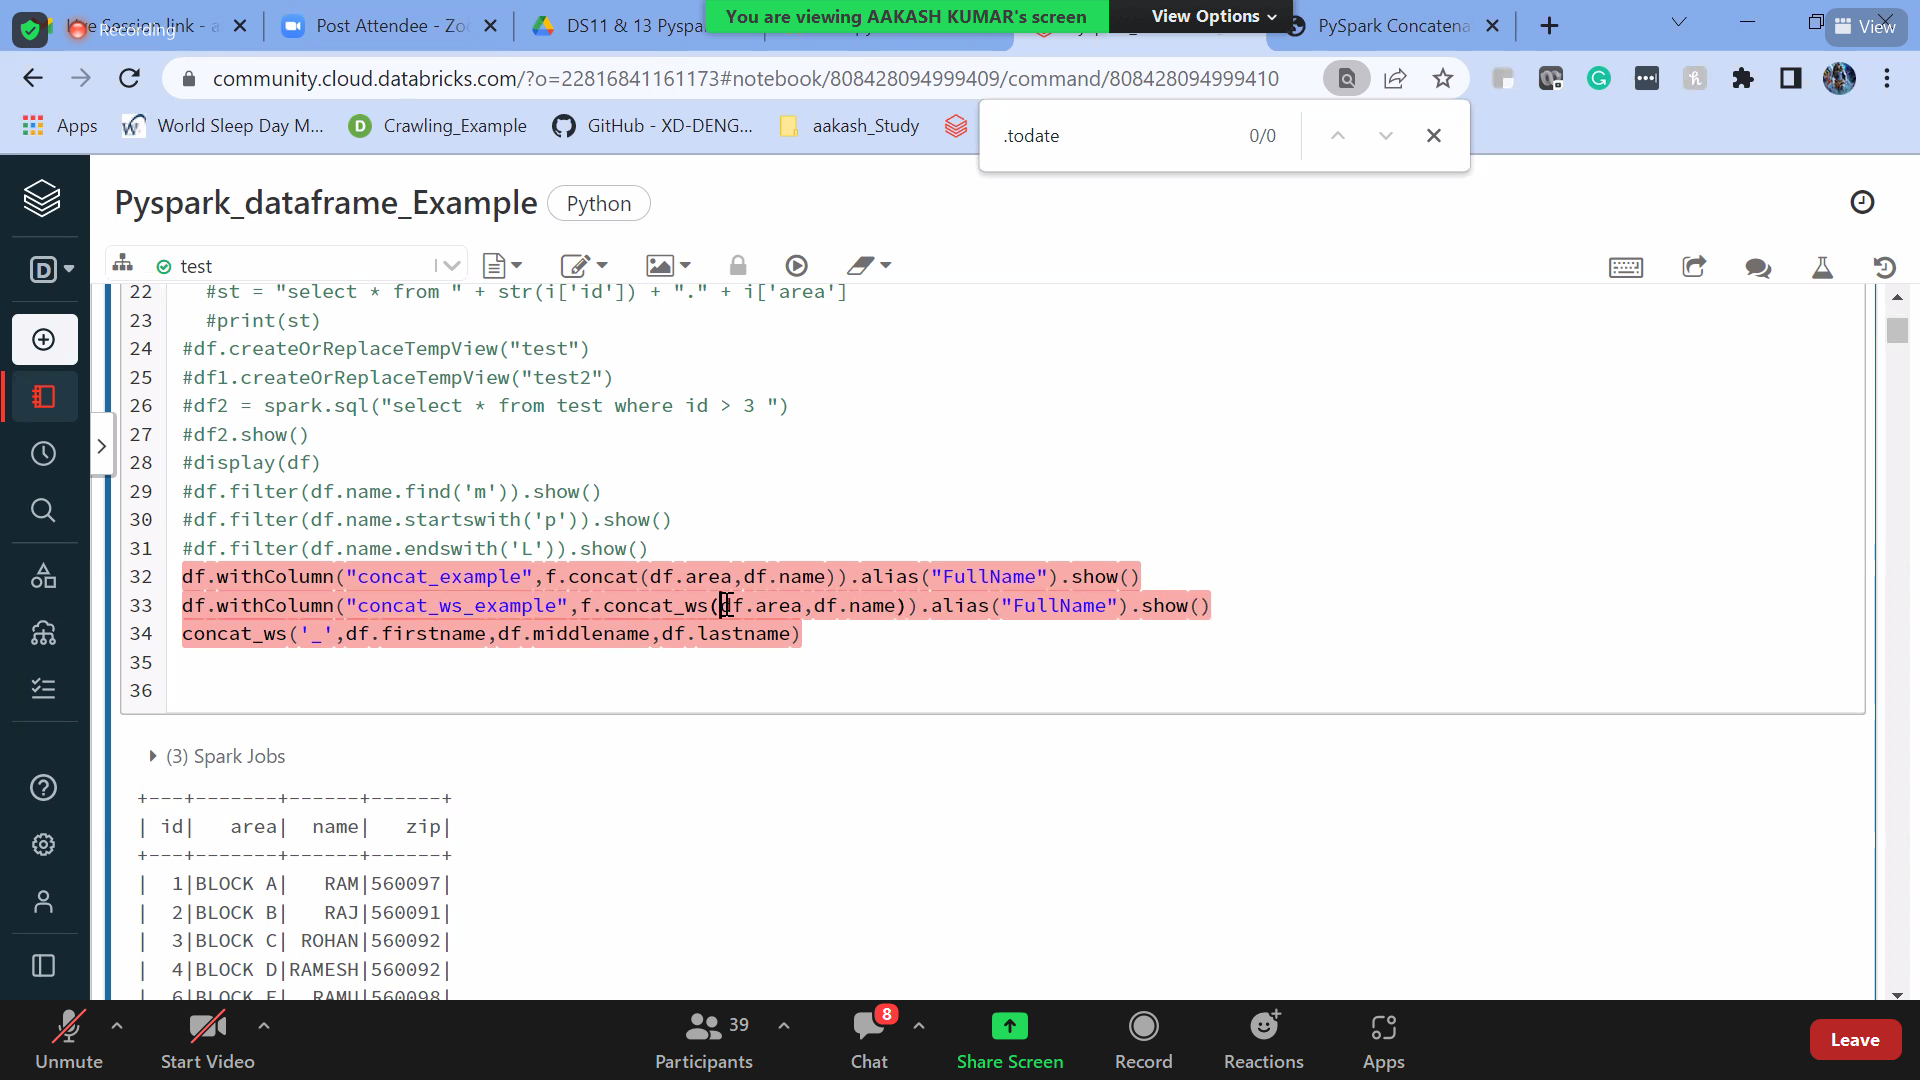

In [ ]:
from IPython.display import Image
Image(filename='/content/Screenshot (1419).png')

# concatenation

In [29]:
# adding two column.
# area and name.

df_concat = df.withColumn("concat_example", F.concat(df.area, df.name))
df_concat.show()

+-----+--------------+-------+-----+------+---------------+
|   id|          area|   name|  zip|gender| concat_example|
+-----+--------------+-------+-----+------+---------------+
| id_1|          null|   abhi|11001|     m|           null|
| id_2|    budh vihar|   null|11002|     f|           null|
| id_3|          null|   riya|11003|     f|           null|
| id_4|        narela|   monu|11004|     f|     narelamonu|
| id_5|          null|   null|11005|     f|           null|
| id_6|    nanak pura|  karan|11006|     m|nanak purakaran|
| id_7|shanti niketan|   null|11007|     m|           null|
| id_8|          null|vaibhav|11001|     m|           null|
| id_9|   mangol puri|   soni|11001|     m|mangol purisoni|
|id_10|shanti niketan|   null|11007|     m|           null|
+-----+--------------+-------+-----+------+---------------+



In [30]:
df_zippi = df.withColumn("zippi_id", F.concat(df.id, df.zip)).show()          # adding column
                                                                              # made a zippi_id from id and zip.

+-----+--------------+-------+-----+------+----------+
|   id|          area|   name|  zip|gender|  zippi_id|
+-----+--------------+-------+-----+------+----------+
| id_1|          null|   abhi|11001|     m| id_111001|
| id_2|    budh vihar|   null|11002|     f| id_211002|
| id_3|          null|   riya|11003|     f| id_311003|
| id_4|        narela|   monu|11004|     f| id_411004|
| id_5|          null|   null|11005|     f| id_511005|
| id_6|    nanak pura|  karan|11006|     m| id_611006|
| id_7|shanti niketan|   null|11007|     m| id_711007|
| id_8|          null|vaibhav|11001|     m| id_811001|
| id_9|   mangol puri|   soni|11001|     m| id_911001|
|id_10|shanti niketan|   null|11007|     m|id_1011007|
+-----+--------------+-------+-----+------+----------+



# creating table

In [31]:
# creting table or dataset.

data = [("ram","sales",21000),
        ("manoj","finance",24000),
        ("sita","hr",45000),
        ("vishal","sales",12000),
        ("fool","sales",2000)]

column = ["name", "dept", "salary"]

In [32]:
df = spark.createDataFrame(data, column)            # combining data with column and creating dataframe.
df.show()

+------+-------+------+
|  name|   dept|salary|
+------+-------+------+
|   ram|  sales| 21000|
| manoj|finance| 24000|
|  sita|     hr| 45000|
|vishal|  sales| 12000|
|  fool|  sales|  2000|
+------+-------+------+



# column in list form

In [33]:
df1 = df.select(F.collect_list("salary"))      # here i want in the list "salary"
df1.show(truncate=False)                       # it will show false truncate.

+----------------------------------+
|collect_list(salary)              |
+----------------------------------+
|[21000, 24000, 45000, 12000, 2000]|
+----------------------------------+



In [34]:
df2 = df.select(F.collect_list("name"))
df2.show(truncate=False)

+--------------------------------+
|collect_list(name)              |
+--------------------------------+
|[ram, manoj, sita, vishal, fool]|
+--------------------------------+



# substring

In [35]:
data = [(1, 20200103),                      # creating dataframe
        (2, 20190304)]

column = ["id","date"]

df5 = spark.createDataFrame(data, column)
df5.show()

+---+--------+
| id|    date|
+---+--------+
|  1|20200103|
|  2|20190304|
+---+--------+



In [36]:
df6 = df5.withColumn("year", F.substring("date",0,4))           # extracting year column
df6.show()                                                      # but index is diffrent here.
                                                                # just take last index which is 4 then you can put how long you want ans

+---+--------+----+
| id|    date|year|
+---+--------+----+
|  1|20200103|2020|
|  2|20190304|2019|
+---+--------+----+



In [37]:
df7 = df6.withColumn("month", F.substring("date",5,2))              # similar extracting month
df7.show()

+---+--------+----+-----+
| id|    date|year|month|
+---+--------+----+-----+
|  1|20200103|2020|   01|
|  2|20190304|2019|   03|
+---+--------+----+-----+



In [38]:
df8 = df7.withColumn("date_n", F.substring("date",7,2))                   # extracting date column
df8.show()

+---+--------+----+-----+------+
| id|    date|year|month|date_n|
+---+--------+----+-----+------+
|  1|20200103|2020|   01|    03|
|  2|20190304|2019|   03|    04|
+---+--------+----+-----+------+



# user defined function

In [39]:
# importing user define function and column.

from pyspark.sql.functions import udf, col 

In [40]:
# making a new column name is res.

def CheckValue(id):                           # using if and elif condition on id.
  if (id>3):
    return "greater than three"
  elif (id<3):
    return "less than three"
  else:
    return "equal to three"


a = udf(CheckValue)                          # check value defining with udf.  

df_res = df8.withColumn("res",a(col("id")))  # then selecting dataframe and column id to generate in the last.
df_res.show()

+---+--------+----+-----+------+---------------+
| id|    date|year|month|date_n|            res|
+---+--------+----+-----+------+---------------+
|  1|20200103|2020|   01|    03|less than three|
|  2|20190304|2019|   03|    04|less than three|
+---+--------+----+-----+------+---------------+



In [41]:
def riy(id):
  if (id>1):
    return "monday"
  elif (id<2):
    return "tuesday"


b = udf(riy)
b_res = df8.withColumn("day_&_day", a(col("id")))
b_res.show()

+---+--------+----+-----+------+---------------+
| id|    date|year|month|date_n|      day_&_day|
+---+--------+----+-----+------+---------------+
|  1|20200103|2020|   01|    03|less than three|
|  2|20190304|2019|   03|    04|less than three|
+---+--------+----+-----+------+---------------+



# making dictionary

In [42]:
dict1 = {}

for i in df8.collect():
  dict1(i["id"]) = i["year"]
print(dict1)

SyntaxError: ignored

In [43]:
df8.show()

+---+--------+----+-----+------+
| id|    date|year|month|date_n|
+---+--------+----+-----+------+
|  1|20200103|2020|   01|    03|
|  2|20190304|2019|   03|    04|
+---+--------+----+-----+------+



#filteration

In [44]:
df.show()

+------+-------+------+
|  name|   dept|salary|
+------+-------+------+
|   ram|  sales| 21000|
| manoj|finance| 24000|
|  sita|     hr| 45000|
|vishal|  sales| 12000|
|  fool|  sales|  2000|
+------+-------+------+



In [45]:
df9 = df.filter(df["dept"] == "sales")            # filteration in dept sales.
df9.show()

+------+-----+------+
|  name| dept|salary|
+------+-----+------+
|   ram|sales| 21000|
|vishal|sales| 12000|
|  fool|sales|  2000|
+------+-----+------+



In [46]:
df10 = df.filter(df["dept"] == "hr")              # filteration in dept hr.
df10.show()

+----+----+------+
|name|dept|salary|
+----+----+------+
|sita|  hr| 45000|
+----+----+------+



# groupby function count and sum

In [47]:
df.show()

+------+-------+------+
|  name|   dept|salary|
+------+-------+------+
|   ram|  sales| 21000|
| manoj|finance| 24000|
|  sita|     hr| 45000|
|vishal|  sales| 12000|
|  fool|  sales|  2000|
+------+-------+------+



In [48]:
df.groupBy("name").count().show()           # counting the name of each person.

+------+-----+
|  name|count|
+------+-----+
| manoj|    1|
|   ram|    1|
|  fool|    1|
|  sita|    1|
|vishal|    1|
+------+-----+



In [49]:
df.groupBy("dept").count().show()        

+-------+-----+
|   dept|count|
+-------+-----+
|finance|    1|
|  sales|    3|
|     hr|    1|
+-------+-----+



In [54]:
df.groupBy("name").sum("salary").show()           # sum of salary if there possible.
                                                  # but it is not showing because the name is unique.

+------+-----------+
|  name|sum(salary)|
+------+-----------+
| manoj|      24000|
|   ram|      21000|
|  fool|       2000|
|  sita|      45000|
|vishal|      12000|
+------+-----------+



# orderby with asc and desc

In [65]:
df.orderBy(F.desc("salary")).show()         # desc in order

+------+-------+------+
|  name|   dept|salary|
+------+-------+------+
|  sita|     hr| 45000|
| manoj|finance| 24000|
|   ram|  sales| 21000|
|vishal|  sales| 12000|
|  fool|  sales|  2000|
+------+-------+------+



In [71]:
df.orderBy(F.asc("salary")).limit(2).show()          # asc in order 
                                                     # using limit because i want 2 output.

+------+-----+------+
|  name| dept|salary|
+------+-----+------+
|  fool|sales|  2000|
|vishal|sales| 12000|
+------+-----+------+



# window function and row_number

In [74]:
from pyspark.sql.window import Window           # importing window
from pyspark.sql.functions import row_number    # importing row_number

In [77]:
window_spec = Window.partitionBy("dept").orderBy("salary")          # doing partition on dept on the basis of salary
res = df.withColumn("row_number",row_number().over(window_spec))    # here deciding now_number
res.show()

+------+-------+------+----------+
|  name|   dept|salary|row_number|
+------+-------+------+----------+
| manoj|finance| 24000|         1|
|  sita|     hr| 45000|         1|
|  fool|  sales|  2000|         1|
|vishal|  sales| 12000|         2|
|   ram|  sales| 21000|         3|
+------+-------+------+----------+



##### practise

In [80]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

window_spec = Window.partitionBy("dept").orderBy("salary")
res = df.withColumn("row_number", row_number().over(window_spec))
res.show()

+------+-------+------+----------+
|  name|   dept|salary|row_number|
+------+-------+------+----------+
| manoj|finance| 24000|         1|
|  sita|     hr| 45000|         1|
|  fool|  sales|  2000|         1|
|vishal|  sales| 12000|         2|
|   ram|  sales| 21000|         3|
+------+-------+------+----------+



# rank

In [84]:
from pyspark.sql.functions import rank    # rank library


res1 = df.withColumn("rank", rank().over(window_spec))      # deciding rank.
res1.show()

+------+-------+------+----+
|  name|   dept|salary|rank|
+------+-------+------+----+
| manoj|finance| 24000|   1|
|  sita|     hr| 45000|   1|
|  fool|  sales|  2000|   1|
|vishal|  sales| 12000|   2|
|   ram|  sales| 21000|   3|
+------+-------+------+----+



# lead function

In [91]:
from pyspark.sql.functions import lead          # lead library importing which is important.
                                                # library is must to call all this.

res2 = df.withColumn("lead",lead("salary",1).over(window_spec))             # using lead
res2.show()                                                                 # salary 1 means difference of 1.
                                                                            # if i put in salary 2 then it will show difference of 2.

+------+-------+------+-----+
|  name|   dept|salary| lead|
+------+-------+------+-----+
| manoj|finance| 24000| null|
|  sita|     hr| 45000| null|
|  fool|  sales|  2000|12000|
|vishal|  sales| 12000|21000|
|   ram|  sales| 21000| null|
+------+-------+------+-----+

